In [1]:
%load_ext autoreload
%autoreload 2

In [111]:
from cell import Cell
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import copy

## first simulation growth without any abx as an integrity check

In [29]:
param = {"ribo_min": 0, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 1, 
         "alpha": 1, # ribosome synthesis rate
         "beta": 1, # translation rate
         "gama": 0.1, # cell wall synthesis rate
         "abx_env": 0, 
         "t_start": 10000, 
         "t_end": -1}
my_sim = Cell(**param)

In [34]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
time_series = my_sim.cell_growth(initial_conditions, length=20, methods="RK45")

100%|██████████| 1000/1000 [00:00<00:00, 333410.49‰/s]


In [35]:
print(time_series)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  1.952e+01  2.000e+01]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 1.000e+00  1.010e+00 ...  1.100e+01  1.100e+01]
            ...
            [ 0.000e+00  1.005e-02 ...  1.000e+01  1.000e+01]
            [ 1.000e+00  1.000e+00 ...  2.701e+07  4.369e+07]]
      sol: None
 t_events: None
 y_events: None
     nfev: 97
     njev: 0
      nlu: 0


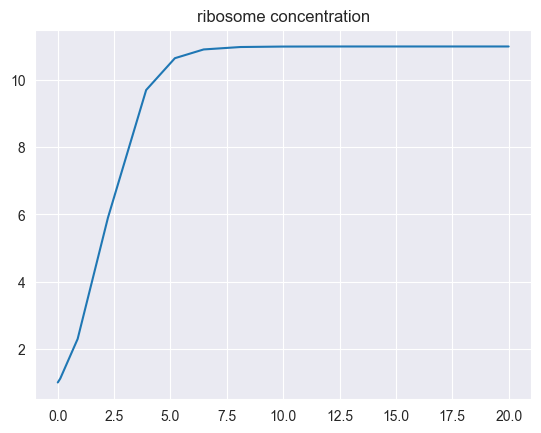

In [36]:
plt.plot(time_series.t, time_series.y[1])
plt.title("ribosome concentration")
plt.show()

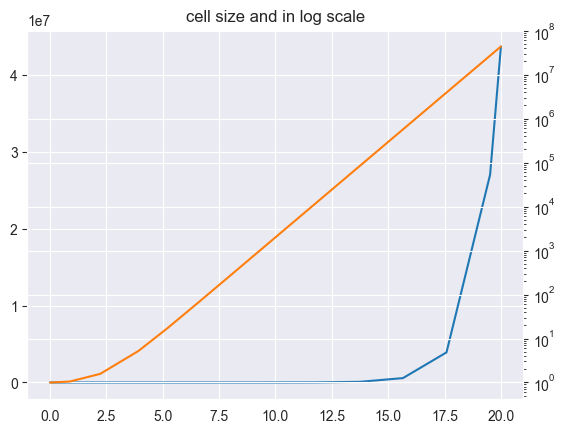

In [38]:
fig, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax_twin = ax.twinx()
ax_twin.plot(time_series.t, time_series.y[4], color="C1")
ax_twin.set_yscale('log')
ax.set(title="cell size and in log scale")
plt.show()

## abx treatment - constant env

In [240]:
time_step = 0.1
admin_time = 10/time_step
param = {"ribo_min": 0, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 0.1, 
         "alpha": 0.1, 
         "beta": 0.1, 
         "gama": 0.05, 
         "abx_env": 100, 
         "t_start": admin_time, 
         "t_end": -1}
my_sim = Cell(**param)

In [241]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 50/time_step
t_eval = np.arange(0, length, time_step)
time_series = my_sim.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|██████████| 1000/1000 [00:01<00:00, 645.67‰/s]


In [242]:
print(time_series)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  4.998e+02  4.999e+02]
        y: [[ 0.000e+00  0.000e+00 ...  9.999e+01  9.999e+01]
            [ 1.000e+00  1.010e+00 ...  1.001e-03  9.995e-04]
            ...
            [ 0.000e+00  1.002e-02 ...  2.000e-03  2.000e-03]
            [ 1.000e+00  1.000e+00 ...  2.314e+04  2.315e+04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 83677
     njev: 0
      nlu: 0


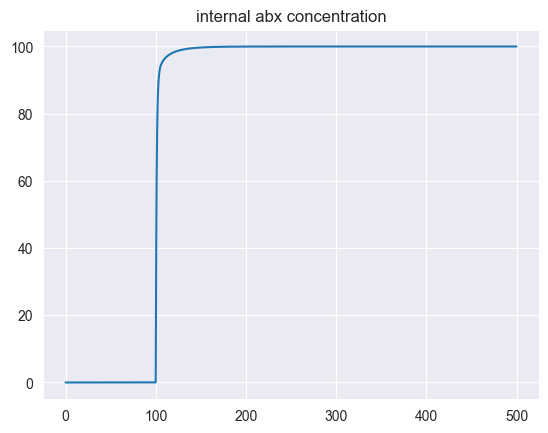

In [243]:
plt.plot(time_series.t, time_series.y[0])
plt.title("internal abx concentration")
plt.show()

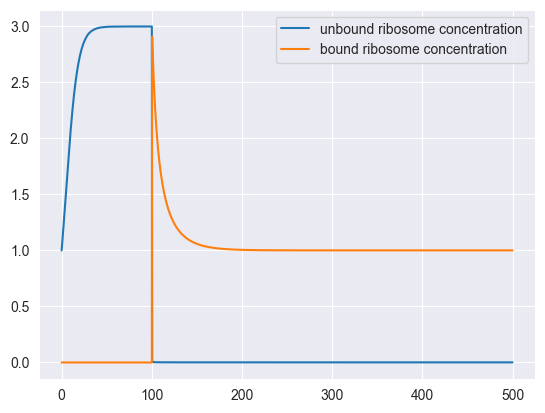

In [244]:
plt.plot(time_series.t, time_series.y[1], label="unbound ribosome concentration")
plt.plot(time_series.t, time_series.y[2], label="bound ribosome concentration")
plt.legend()
plt.show()

0.0020002040065365493


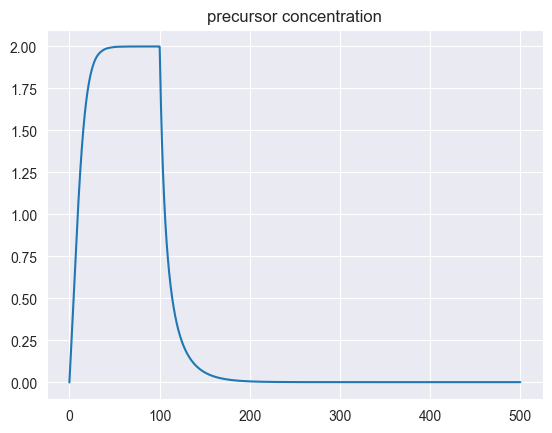

In [245]:
plt.plot(time_series.t, time_series.y[3])
plt.title("precursor concentration")
print(time_series.y[3][-1])
plt.show()

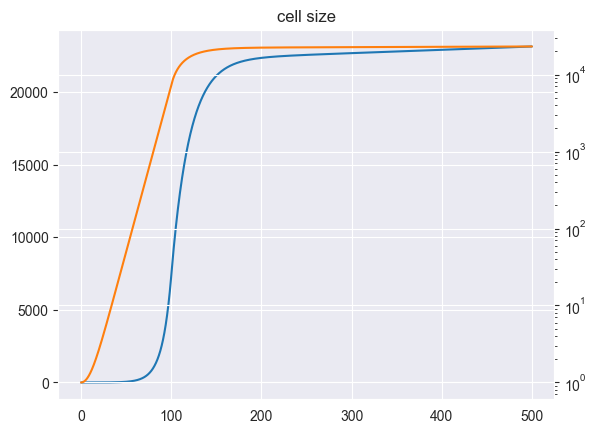

In [246]:
fig2, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax_twin = ax.twinx()
ax_twin.plot(time_series.t, time_series.y[4], color="C1")
ax_twin.set_yscale('log')
ax.set(title="cell size")
plt.show()

## try see cell size in perfect sizer

In [247]:
print(len(time_series.y[4]))
cell_size = copy.deepcopy(time_series.y[4])
timer = 0
sizer = 1
print(admin_time)
for i in range(len(cell_size)):
    # if timer >= 10:
    #     cell_size[i:] = cell_size[i:]/2
    #     timer = 0
    # else:
    #     timer += 1
    if time_series.t[i] >= admin_time:
        break
    if cell_size[i] >= sizer:
        print(f"division at {time_series.t[i]}, cell size {cell_size[i]}")
        cell_size[i:] = cell_size[i:]/2

5000
100.0
division at 0.0, cell size 1.0
division at 16.400000000000002, cell size 1.0059984519066325
division at 24.400000000000002, cell size 1.005321036089522
division at 31.700000000000003, cell size 1.008688637802318
division at 38.7, cell size 1.004826945039636
division at 45.7, cell size 1.0077512208838129
division at 52.6, cell size 1.0025136913052188
division at 59.6, cell size 1.009279022358975
division at 66.5, cell size 1.0053768324844055
division at 73.4, cell size 1.0007728791856751
division at 80.4, cell size 1.0095073439649214
division at 87.30000000000001, cell size 1.0027578084793065
division at 94.2, cell size 1.000898305260365


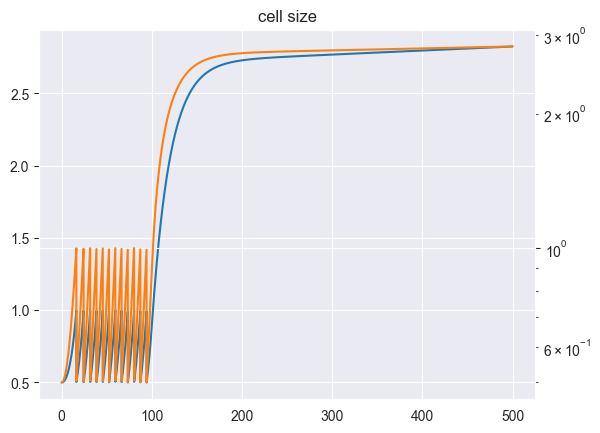

In [248]:
fig, ax = plt.subplots()
ax.plot(time_series.t, cell_size)
ax_twin = ax.twinx()
ax_twin.plot(time_series.t, cell_size, color="C1")
ax_twin.set_yscale('log')
ax.set(title="cell size")
plt.show()